<a href="https://colab.research.google.com/github/emcgeever-husky/Econ3916/blob/main/Lab%203/WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# import packages
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Define Economies: CHN (China), UMC (Upper Middle Income), WLD (World)
country_codes = ['CHN', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [18]:
## Fetch data through API, transpose and format dataframe, focus in on target (CHN)
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(1980, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract China for specific calculations
df_chn = df.xs('CHN', axis=1, level=0).copy()

Fetching data...


In [19]:
## Check China DataFrame
df_chn

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
1980,NaN,NaN,13.902126,10.134197,34.544058,11.406859,4.283991e+11,436.591787,35.248167,NaN,NaN,NaN
1981,NaN,NaN,13.337513,12.419828,32.889664,11.323997,4.503022e+11,453.072707,33.524784,NaN,NaN,NaN
1982,NaN,NaN,13.372093,10.998649,31.919215,8.656826,4.910963e+11,486.894421,33.371722,NaN,NaN,NaN
1983,NaN,NaN,14.121840,9.499537,31.864600,8.387177,5.437780e+11,531.391311,32.485702,NaN,NaN,NaN
1984,NaN,NaN,15.235039,9.508537,34.312889,9.487803,6.266094e+11,604.354027,34.169821,NaN,NaN,NaN
1985,NaN,NaN,14.372689,8.321299,38.991463,12.353039,7.107973e+11,676.279975,34.864358,NaN,NaN,NaN
1986,NaN,NaN,14.009350,8.696216,37.657880,11.148838,7.743075e+11,725.829363,35.067146,NaN,NaN,NaN
1987,7.233836,NaN,13.261616,12.460125,37.255072,12.353709,8.643457e+11,797.341143,37.152040,NaN,NaN,NaN
1988,18.811818,NaN,12.647964,14.357717,39.011458,15.655622,9.613477e+11,872.659354,37.819602,NaN,NaN,NaN


In [20]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_chn['Natural_Rate_Unemp'] = df_chn['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_chn['Productivity'] = df_chn['GDP_Const'] / df_chn['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_chn['NCO'] = df_chn['Exports_GDP'] - df_chn['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_chn['Budget_Balance'] = df_chn['Tax_Rev_GDP'] - df_chn['Gov_Exp_GDP']

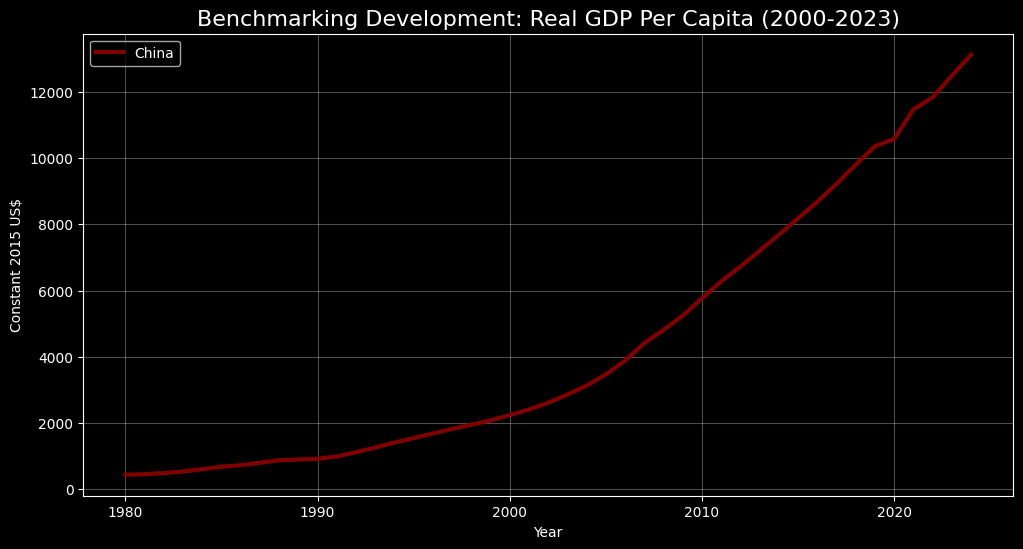

In [21]:
### Plot China isolated
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='maroon', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

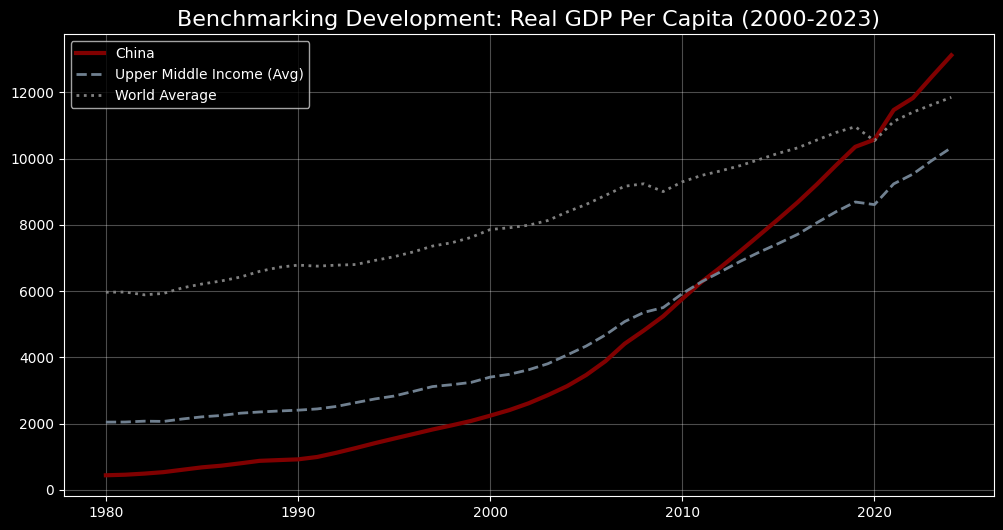

In [22]:
## Plot China benchmark against larger WD and WDB classification
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='maroon', linewidth=3)
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='slategray', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

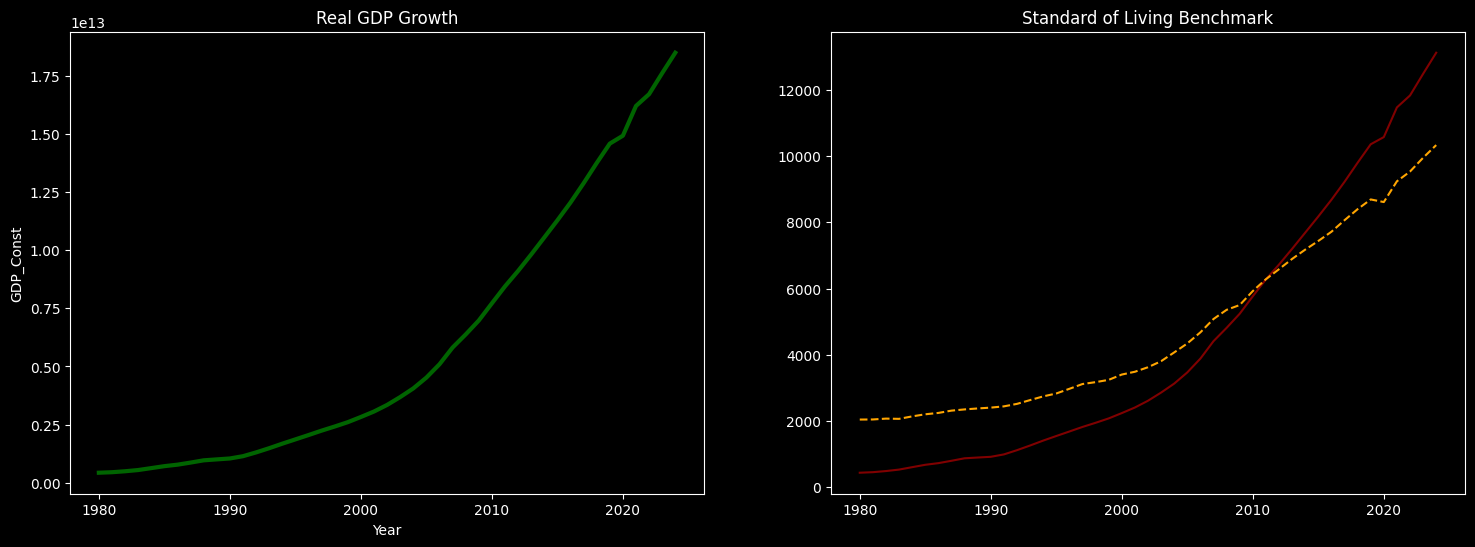

In [23]:
## Wealth and Growth Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_chn, x=df_chn.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], color='maroon')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

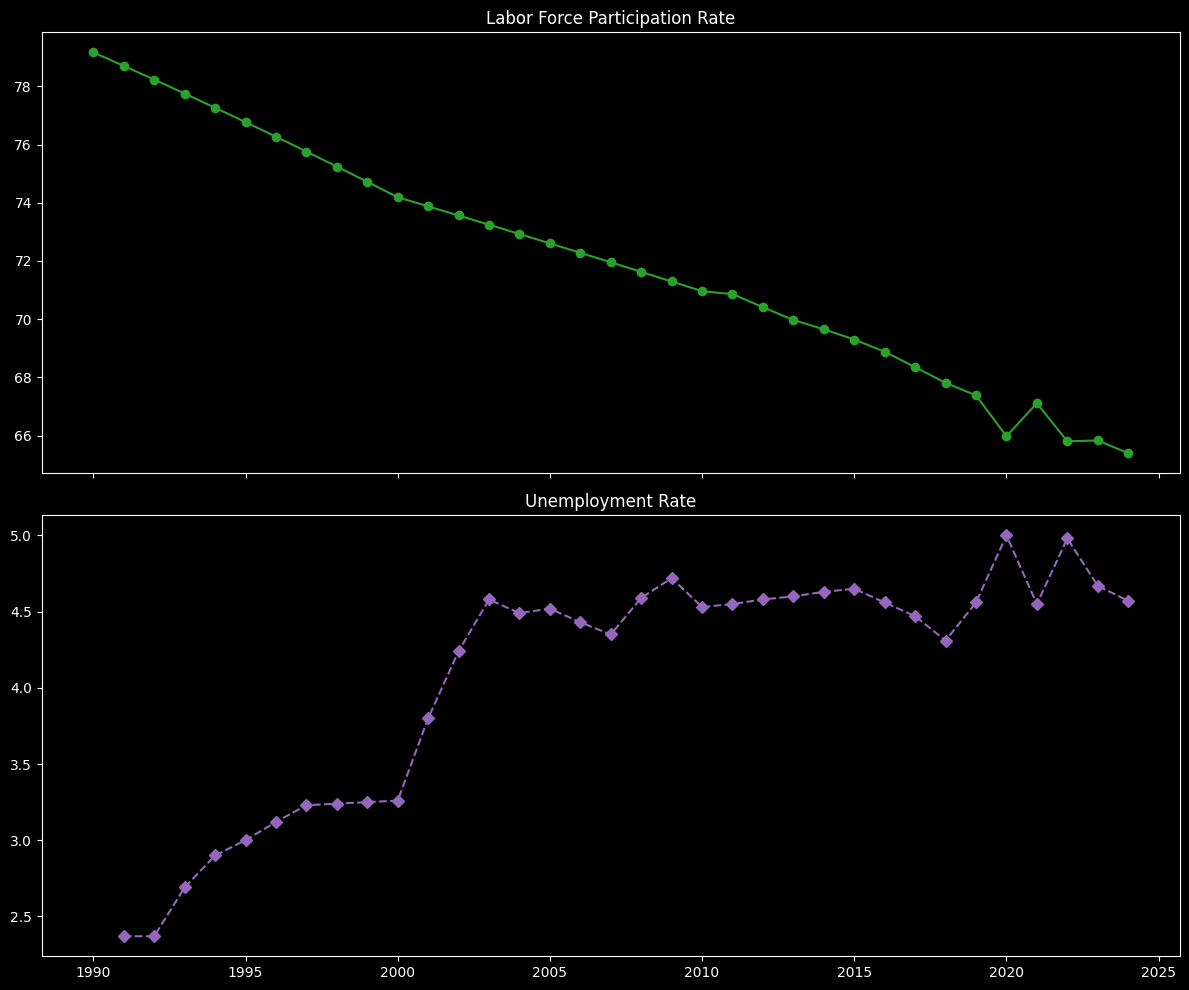

In [24]:
## Labor Market
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_chn.index, df_chn['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_chn.index, df_chn['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

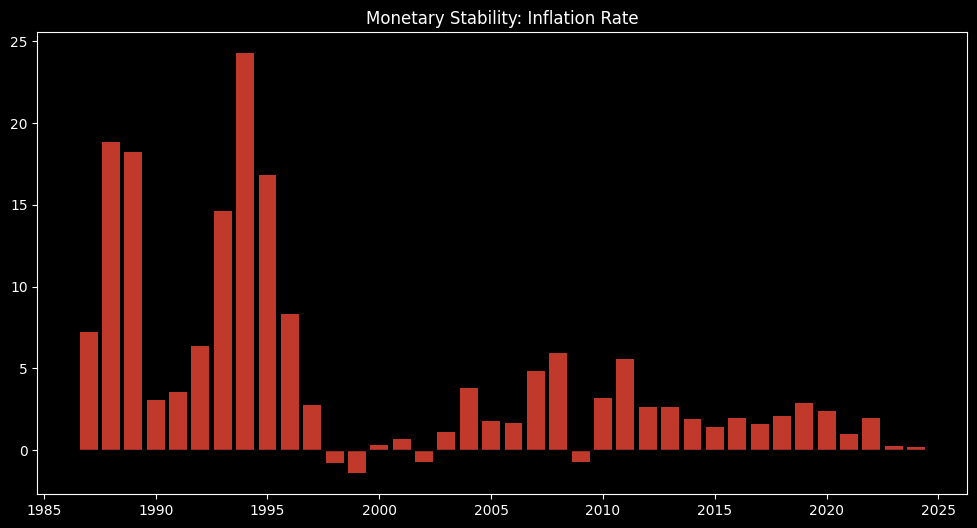

In [25]:
## Inflation
plt.figure(figsize=(12, 6))

plt.bar(df_chn.index, df_chn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

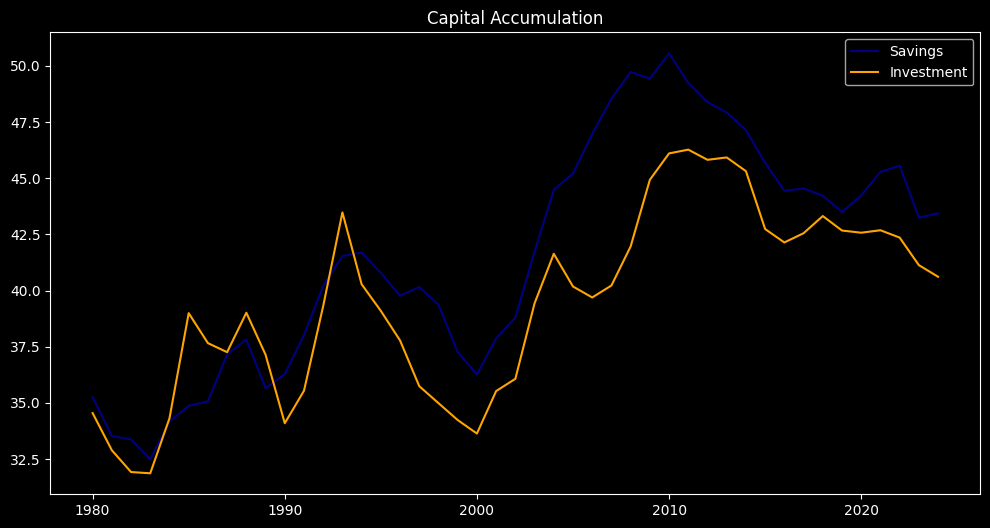

In [26]:
# Savings & Investment
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_chn.index, df_chn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

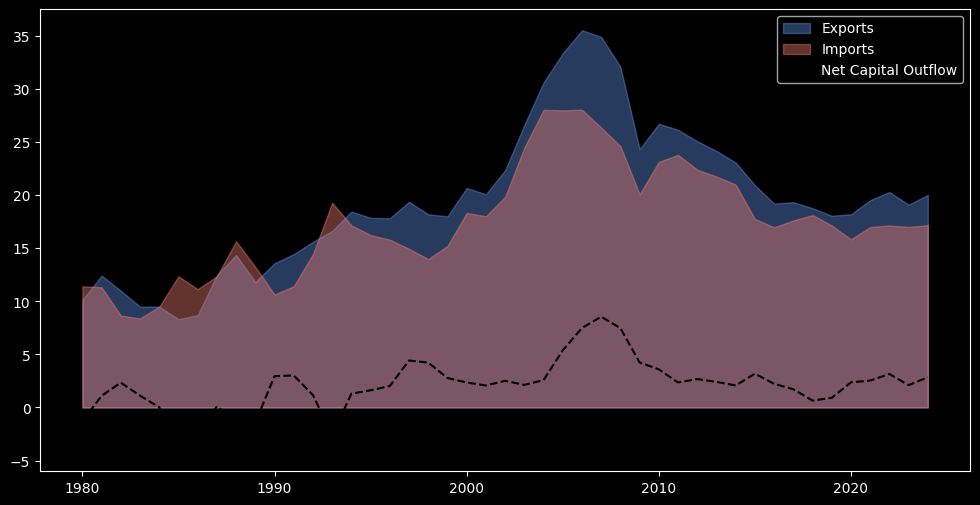

In [27]:
# Trade Balance & NCO
plt.figure(figsize=(12, 6))
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chn.index, df_chn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

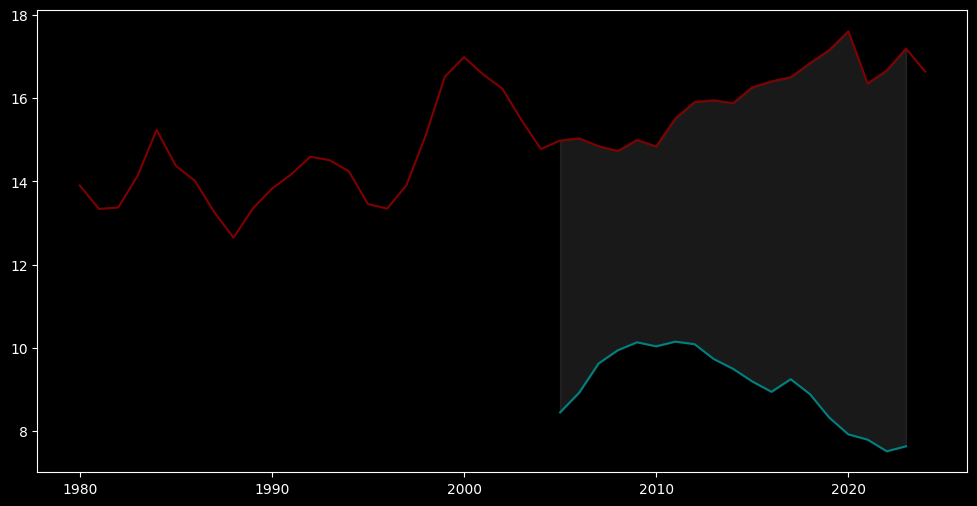

In [28]:
## Fiscal Policy
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_chn.index, df_chn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

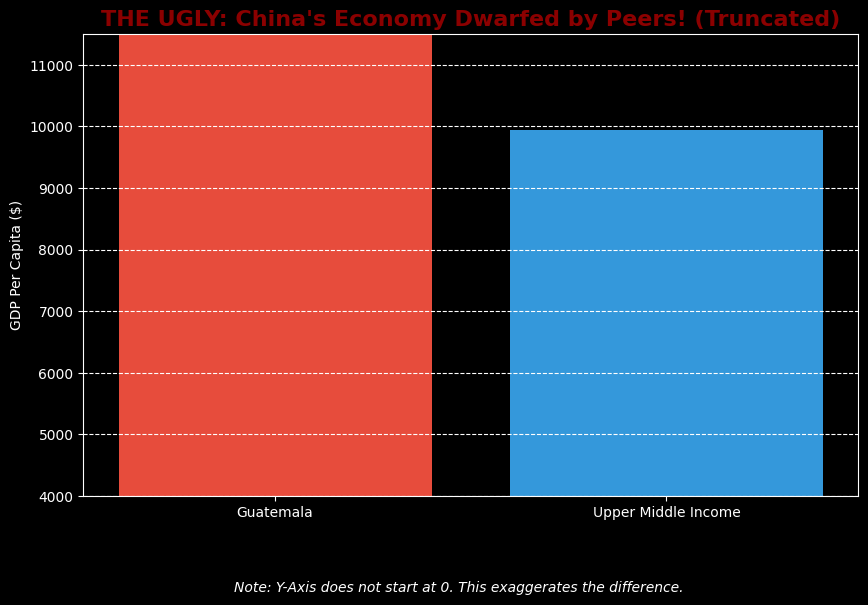

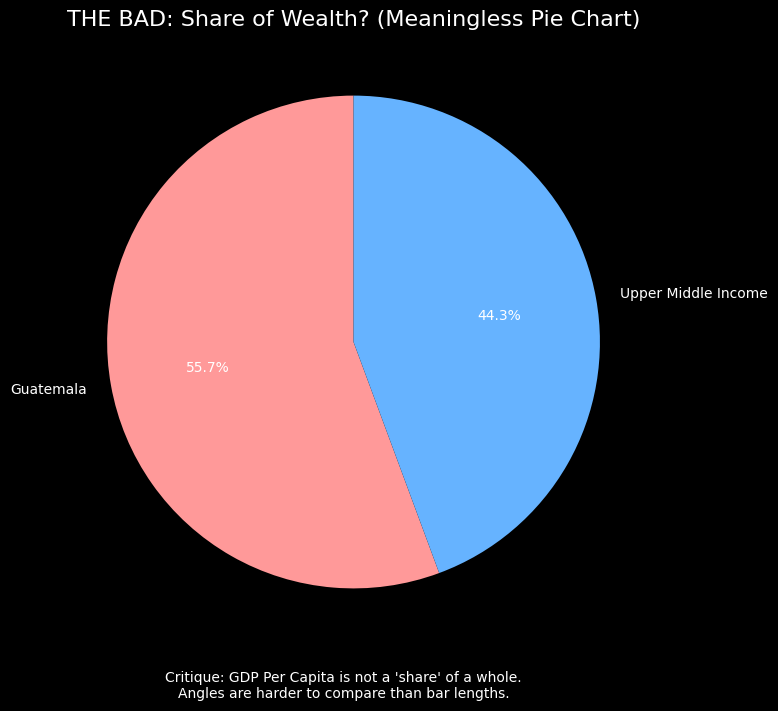

In [29]:
### Examples of how bad charts mislead audiences
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
chn_val = df.loc[snapshot_year, ('CHN', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [chn_val, umc_val]
labels = ['Guatemala', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes CHN look tiny.
plt.ylim(4000, 11500)

plt.title("THE UGLY: China's Economy Dwarfed by Peers! (Truncated)", fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

## Bad Chart == Pie Chart
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

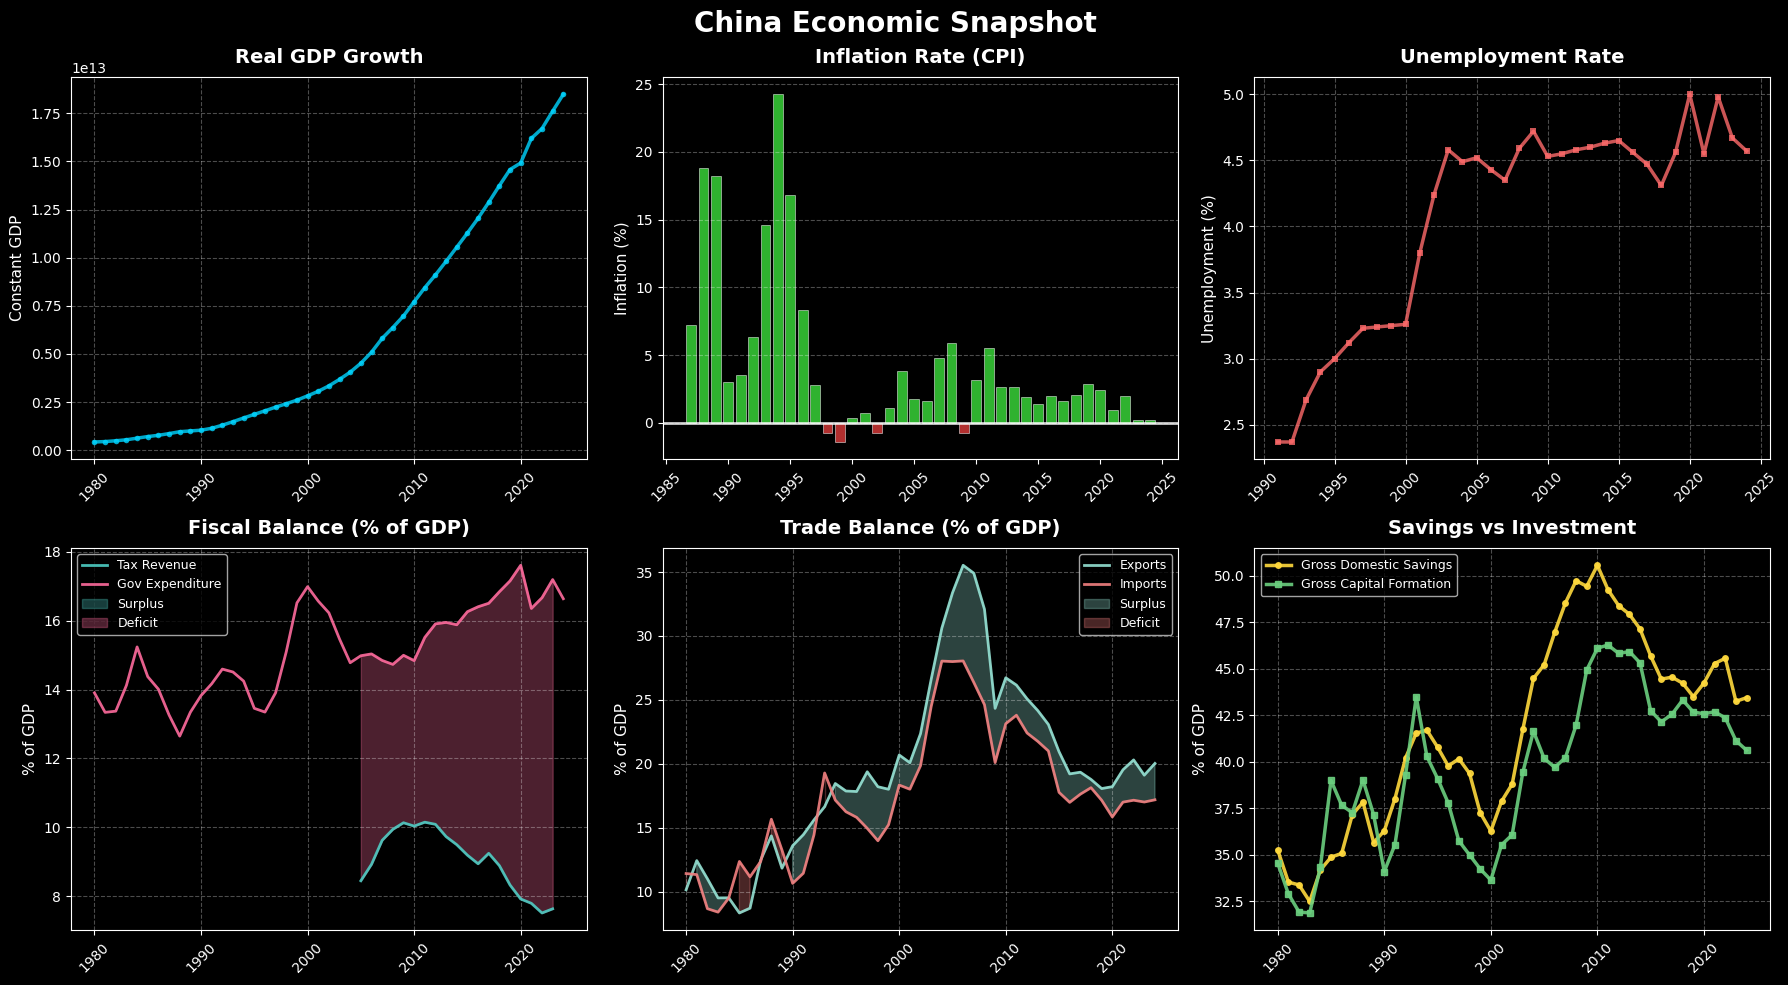

Dashboard created successfully!
Saved to: /mnt/user-data/outputs/china_economic_dashboard.png


In [30]:
## AI Dashboard
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the dark background style
plt.style.use('dark_background')
sns.set_palette("husl")

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('China Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# Assuming df_chn has a time index or year column
# If you have a specific date/year column, replace df_chn.index with df_chn['year'] or similar

# ============================================================================
# TOP LEFT: Real GDP (Line Chart)
# ============================================================================
ax1 = axes[0, 0]
ax1.plot(df_chn.index, df_chn['GDP_Const'], linewidth=2.5, color='#00d4ff', marker='o',
         markersize=4, markeredgewidth=0, alpha=0.8)
ax1.set_title('Real GDP Growth', fontsize=14, fontweight='bold', pad=10)
ax1.set_ylabel('Constant GDP', fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# ============================================================================
# TOP MIDDLE: Inflation Rate (Bar Chart with horizontal line at 0)
# ============================================================================
ax2 = axes[0, 1]
colors = ['#ff4444' if x < 0 else '#44ff44' for x in df_chn['Inflation_CPI']]
ax2.bar(df_chn.index, df_chn['Inflation_CPI'], color=colors, alpha=0.7, edgecolor='white', linewidth=0.5)
ax2.axhline(y=0, color='white', linestyle='-', linewidth=2, alpha=0.8)
ax2.set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold', pad=10)
ax2.set_ylabel('Inflation (%)', fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
ax2.tick_params(axis='x', rotation=45)

# ============================================================================
# TOP RIGHT: Unemployment Rate (Line Chart)
# ============================================================================
ax3 = axes[0, 2]
ax3.plot(df_chn.index, df_chn['Unemployment_Rate'], linewidth=2.5, color='#ff6b6b',
         marker='s', markersize=4, markeredgewidth=0, alpha=0.8)
ax3.set_title('Unemployment Rate', fontsize=14, fontweight='bold', pad=10)
ax3.set_ylabel('Unemployment (%)', fontsize=11)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.tick_params(axis='x', rotation=45)

# ============================================================================
# BOTTOM LEFT: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
# ============================================================================
ax4 = axes[1, 0]
ax4.plot(df_chn.index, df_chn['Tax_Rev_GDP'], linewidth=2, color='#4ecdc4',
         label='Tax Revenue', alpha=0.9)
ax4.plot(df_chn.index, df_chn['Gov_Exp_GDP'], linewidth=2, color='#ff6b9d',
         label='Gov Expenditure', alpha=0.9)
ax4.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'],
                  where=(df_chn['Tax_Rev_GDP'] >= df_chn['Gov_Exp_GDP']),
                  color='#4ecdc4', alpha=0.3, label='Surplus')
ax4.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'],
                  where=(df_chn['Tax_Rev_GDP'] < df_chn['Gov_Exp_GDP']),
                  color='#ff6b9d', alpha=0.3, label='Deficit')
ax4.set_title('Fiscal Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
ax4.set_ylabel('% of GDP', fontsize=11)
ax4.legend(loc='best', fontsize=9, framealpha=0.8)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.tick_params(axis='x', rotation=45)

# ============================================================================
# BOTTOM MIDDLE: Trade Balance (Fill area between Exports and Imports)
# ============================================================================
ax5 = axes[1, 1]
ax5.plot(df_chn.index, df_chn['Exports_GDP'], linewidth=2, color='#95e1d3',
         label='Exports', alpha=0.9)
ax5.plot(df_chn.index, df_chn['Imports_GDP'], linewidth=2, color='#f38181',
         label='Imports', alpha=0.9)
ax5.fill_between(df_chn.index, df_chn['Exports_GDP'], df_chn['Imports_GDP'],
                  where=(df_chn['Exports_GDP'] >= df_chn['Imports_GDP']),
                  color='#95e1d3', alpha=0.3, label='Surplus')
ax5.fill_between(df_chn.index, df_chn['Exports_GDP'], df_chn['Imports_GDP'],
                  where=(df_chn['Exports_GDP'] < df_chn['Imports_GDP']),
                  color='#f38181', alpha=0.3, label='Deficit')
ax5.set_title('Trade Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
ax5.set_ylabel('% of GDP', fontsize=11)
ax5.legend(loc='best', fontsize=9, framealpha=0.8)
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.tick_params(axis='x', rotation=45)

# ============================================================================
# BOTTOM RIGHT: Savings vs Investment (Dual Lines)
# ============================================================================
ax6 = axes[1, 2]
ax6.plot(df_chn.index, df_chn['Gross_Dom_Savings'], linewidth=2.5, color='#ffd93d',
         marker='o', markersize=4, label='Gross Domestic Savings', alpha=0.9)
ax6.plot(df_chn.index, df_chn['Gross_Cap_Formation'], linewidth=2.5, color='#6bcf7f',
         marker='s', markersize=4, label='Gross Capital Formation', alpha=0.9)
ax6.set_title('Savings vs Investment', fontsize=14, fontweight='bold', pad=10)
ax6.set_ylabel('% of GDP', fontsize=11)
ax6.legend(loc='best', fontsize=9, framealpha=0.8)
ax6.grid(True, alpha=0.3, linestyle='--')
ax6.tick_params(axis='x', rotation=45)

# Use tight layout to prevent overlap
plt.tight_layout()

# Save the figure
# plt.savefig('/mnt/user-data/outputs/china_economic_dashboard.png', dpi=300, bbox_inches='tight', facecolor='#1a1a1a')

# Display the plot
plt.show()

print("Dashboard created successfully!")
#print("Saved to: /mnt/user-data/outputs/china_economic_dashboard.png")